In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline


In [2]:
# These are pricess of fries and burger
# These will not be known to the NN, it will need to figure it out
w_orig = [15, 25] 

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Generate some training data
x = []
y = []

for i in range(100):
    x1 = np.random.randint(0, 5)
    x2 = np.random.randint(0, 5)
    x.append([x1, x2])
    y.append((x1 * w_orig[0] + x2 * w_orig[1]))

x = np.array(x)
y = np.array(y)

In [5]:
def error(prediction, ground_truth):
    return np.sum(np.square(prediction - ground_truth)) / 2.0

To plot a graph of the errors

In [7]:
wa = np.arange(0, 30, 1)
wb = np.arange(0, 30, 1)

X, Y = np.meshgrid(wa, wb)
er = np.zeros(X.shape)

for w1 in wa:
    for w2 in wb:
        w_forgraph = [w1, w2]
        er[w1][w2] = error((np.array(w_forgraph).dot(x.T)), y)

In [8]:
# Check what's the error when w1 = 15 and w2 = 25, should be 0
er[15][25]

0.0

In [9]:
# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
xlen = len(wa)
ylen = len(wb)
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y1 in range(ylen):
    for x1 in range(xlen):
        colors[x1, y1] = colortuple[(x1 + y1) % len(colortuple)]

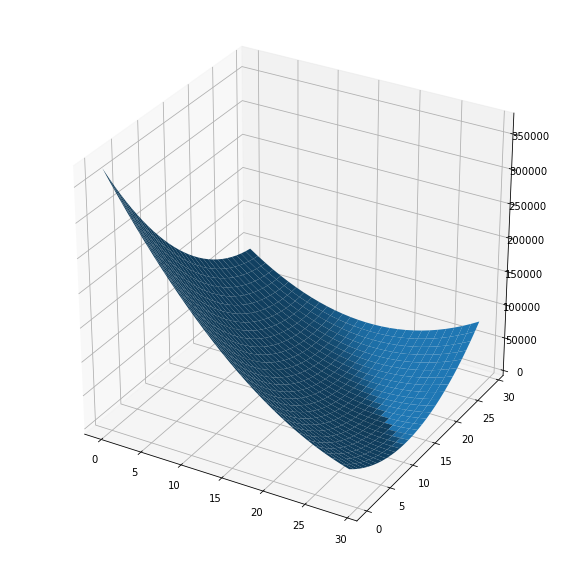

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, er, )
plt.show()

We can see from the plot that the lowest error is when w1 is 15 and w2 is 25. But we want a neural network to figure it out.




In [19]:
#!jupyter nbconvert --to script gradient_descent_sigmoid_activation.ipynb

[NbConvertApp] Converting notebook gradient_descent_sigmoid_activation.ipynb to script
[NbConvertApp] Writing 2266 bytes to gradient_descent_sigmoid_activation.py


Let's try to implement NN with sigmoid function

In [ ]:
learning_rate = 0.001
err = float('inf')
my_w = np.random.rand(2, ).T
my_w

In [ ]:
for i in range(1000):
    t = my_w.dot(x.T)
    e = error(t, y)
    # Update w's
    for idx, item in enumerate(x):
        my_w[0] = my_w[0] - learning_rate * (t[idx] - y[idx]) * item[0]
        my_w[1] = my_w[1] - learning_rate * (t[idx] - y[idx]) * item[1]
my_w

In [ ]:
print('The weights are:')
my_w